<a href="https://colab.research.google.com/github/PrabhatIITR/py-jupyter/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
# stdlib imports
from datetime import datetime
from time import time

# Third party imports
import matplotlib.pyplot as plt
from obspy.geodetics.base import gps2dist_azimuth
import pandas as pd

# Local imports
from libcomcat.dataframes import get_history_data_frame
from libcomcat.search import (get_event_by_id, get_authoritative_info, search)

In [ ]:
! pip install obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 80.8 MB/s eta 0:00:00


In [ ]:
! pip install usgs-libcomcat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 94.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
  Attempting uninstall: geopy
 

### Magnitude

In [ ]:
%matplotlib inline

In [ ]:
# stdlib imports
from datetime import datetime
from time import time

# Third party imports
import matplotlib.pyplot as plt
from obspy.geodetics.base import gps2dist_azimuth
import pandas as pd

# Local imports
from libcomcat.dataframes import get_history_data_frame
from libcomcat.search import (get_event_by_id, get_authoritative_info, search)

### Data

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Test_Python/NCS-USGS.xlsx"

In [ ]:
path = "/content/drive/MyDrive/Test_Python/NCS-USGS.xlsx"
tablefile = '/content/drive/MyDrive/Test_Python/NCS-USGS.xlsx'
if 'dataframe' not in vars():
    dataframe = pd.read_excel(tablefile)
else:
    dataframe.to_excel(tablefile, index=False)

In [ ]:
dataframe.count()

Origin              858
Time                858
Lat(NCS)            858
Long(NCS)           858
Depth(NCS)          858
Magnitude(NCS)      858
Unnamed: 6            0
Date               1296
Time.1             1296
latitude(USGS)     1296
longitude(USGS)    1296
depth(USGS)        1296
mag (USGS)         1296
dtype: int64

### Magnitude Difference

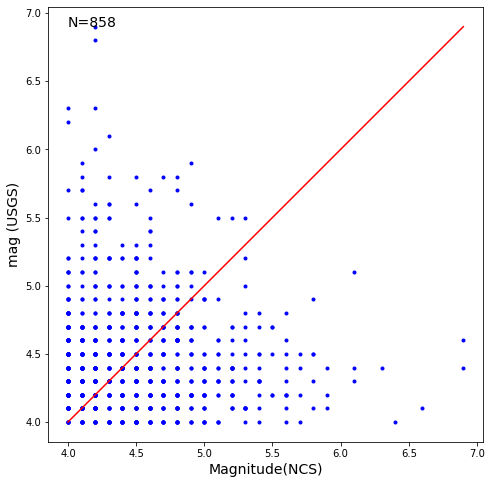

In [ ]:
reg_type = 'Magnitude(NCS)'
us_type = 'mag (USGS)'
c1 = dataframe[reg_type].notnull()
c2 = dataframe[us_type].notnull()
N = len(dataframe[c1&c2])
magdf = dataframe[c1&c2]
reg_mag = magdf[reg_type]
us_mag = magdf[us_type]
minmag = min(reg_mag.min(),us_mag.min())
maxmag = max(reg_mag.max(),us_mag.max())
fig = plt.figure(figsize=(8,8))
plt.plot(reg_mag, us_mag,'b.');
plt.plot([minmag,maxmag],[minmag,maxmag],'r');
# plt.axes([minmag,maxmag,minmag,maxmag]);
plt.axis('square');
plt.xlabel(reg_type, fontsize=14);
plt.ylabel(us_type, fontsize=14);
plt.text(minmag, maxmag, 'N=%i' % N, fontsize=14);
#sdate = stime.strftime('%b %d, %Y')
#edate = etime.strftime('%b %d, %Y')
fmt = '%s vs. %s (%s to %s)'
#plt.title(fmt % (reg_type, us_type, sdate, edate), fontsize=16);

### Location Difference

In [ ]:
#regname = 'ld'
lat1col = 'Lat(NCS)' 
lon1col = 'Long(NCS)' 
lat2col = 'latitude(USGS)'
lon2col = 'longitude(USGS)'
c1 = dataframe[lat1col].notnull()
c2 = dataframe[lon1col].notnull()
c3 = dataframe[lat2col].notnull()
c4 = dataframe[lon2col].notnull()
locdf = dataframe[c1 & c2 & c3 & c4].copy()
distances = []
for idx, row in locdf.iterrows():
    lat1 = row[lat1col]
    lon1 = row[lon1col]
    lat2 = row[lat2col]
    lon2 = row[lon2col]
    dist, az1, az2 = gps2dist_azimuth(lat1, lon1, lat2, lon2)
    distances.append(dist/1000.0)

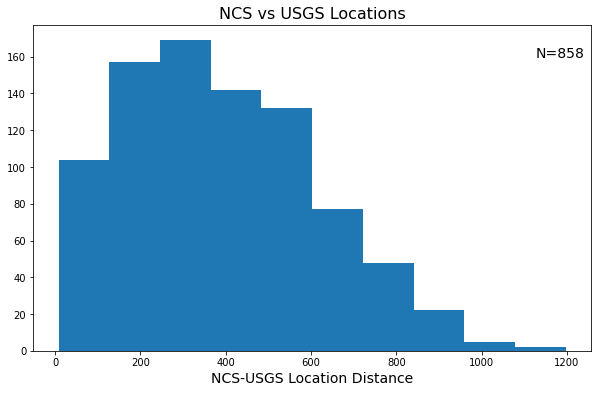

In [ ]:
fig = plt.figure(figsize=(10,6));
plt.hist(distances, bins=10);
plt.xlabel('NCS-USGS Location Distance', fontsize=14);
xmin,xmax,ymin,ymax = plt.axis();
xpos = xmax - (xmax-xmin)/10
ypos = ymax - (ymax-ymin)/10
plt.text(xpos,ypos,'N=%i' % len(distances), fontsize=14);
plt.title('NCS vs USGS Locations', fontsize=16);

### Depth Difference

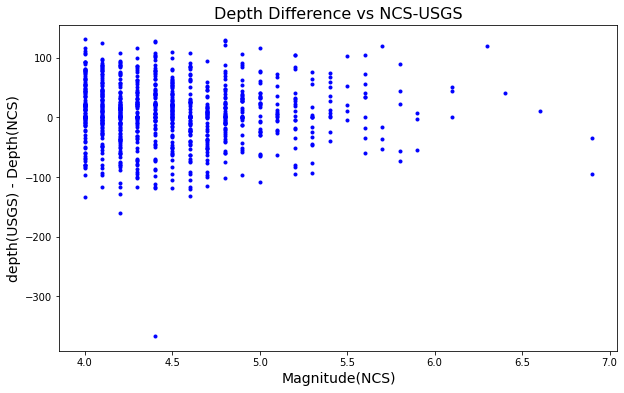

In [ ]:
plt.figure(figsize=(10,6));
regcol = 'Depth(NCS)'
uscol = 'depth(USGS)'
ddepth = locdf[uscol] - locdf[regcol]
plt.plot(locdf['Magnitude(NCS)'],ddepth,'b.');
plt.xlabel('Magnitude(NCS)', fontsize=14);
plt.ylabel('depth(USGS) - Depth(NCS)', fontsize=14);
plt.title('Depth Difference vs NCS-USGS', fontsize=16);